In [2]:
import pandas as pd

In [6]:
df= pd.read_csv("Ev_by_place.csv")
print(df)

                       EV Maker        Place        State  Market Share (%)  \
0                   Tata Motors         Pune  Maharashtra             25.09   
1             Mahindra Electric    Bengaluru    Karnataka             13.88   
2                  Ather Energy    Bengaluru    Karnataka             16.50   
3                 Hero Electric    New Delhi        Delhi             25.40   
4                  Ola Electric  Krishnagiri   Tamil Nadu             27.54   
..                          ...          ...          ...               ...   
57          YC Electric Vehicle        Delhi        Delhi             16.65   
58  Dilli Electric Auto Pvt Ltd    New Delhi        Delhi             18.44   
59           Electrotherm India    Ahmedabad      Gujarat             10.20   
60        Lohia Auto Industries     Kashipur  Uttarakhand              5.33   
61                 Euler Motors    New Delhi        Delhi             21.02   

    Production Capacity (Units/Year)  Annual Sales 

In [8]:
df.columns

Index(['EV Maker', 'Place', 'State', 'Market Share (%)',
       'Production Capacity (Units/Year)', 'Annual Sales (Units)',
       'Charging Stations'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EV Maker                          62 non-null     object 
 1   Place                             62 non-null     object 
 2   State                             62 non-null     object 
 3   Market Share (%)                  62 non-null     float64
 4   Production Capacity (Units/Year)  62 non-null     int64  
 5   Annual Sales (Units)              62 non-null     int64  
 6   Charging Stations                 62 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.5+ KB


In [15]:
df.head()

,EV Maker,Place,State,Market Share (%),Production Capacity (Units/Year),Annual Sales (Units),Charging Stations
0,Tata Motors,Pune,Maharashtra,25.09,134279,243200,1445
1,Mahindra Electric,Bengaluru,Karnataka,13.88,170968,4572,870
2,Ather Energy,Bengaluru,Karnataka,16.50,260447,262174,34
3,Hero Electric,New Delhi,Delhi,25.40,17498,105106,1188
4,Ola Electric,Krishnagiri,Tamil Nadu,27.54,419553,97472,1267


In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
features=["Market Share (%)","Production Capacity (Units/Year)","Annual Sales (Units)","Charging Stations"]
x=df[features]

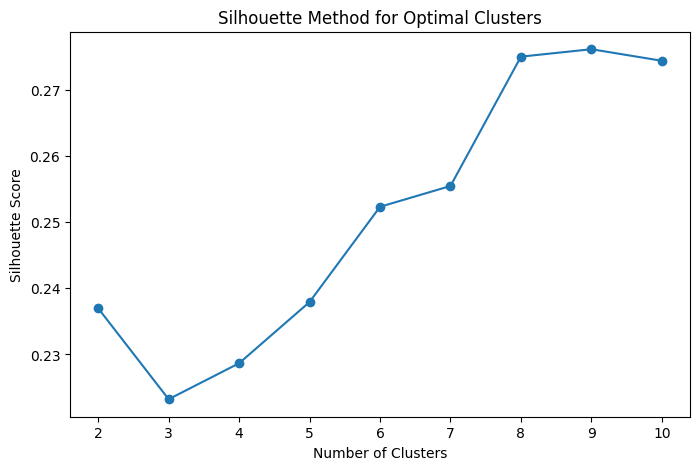

In [29]:
from sklearn.metrics import silhouette_score

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Finding the optimal number of clusters using the Silhouette Method
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score is undefined for k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Clusters')
plt.show()


In [32]:
from sklearn.cluster import AgglomerativeClustering

# Choosing the number of clusters (same as elbow method result)
optimal_k = 3

# Applying Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=optimal_k)
df["Cluster"] = agg_cluster.fit_predict(X_scaled)

# Displaying cluster assignments
df[["EV Maker", "Place", "State", "Cluster"]].head(10)


,EV Maker,Place,State,Cluster
0,Tata Motors,Pune,Maharashtra,1
1,Mahindra Electric,Bengaluru,Karnataka,2
2,Ather Energy,Bengaluru,Karnataka,0
3,Hero Electric,New Delhi,Delhi,1
4,Ola Electric,Krishnagiri,Tamil Nadu,1
5,Ashok Leyland,Chennai,Tamil Nadu,0
6,TVS Motor Company,Hosur,Tamil Nadu,0
7,Bajaj Auto,Pune,Maharashtra,0
8,MG Motor India,Halol,Gujarat,1
9,Hyundai Motor India,Chennai,Tamil Nadu,1


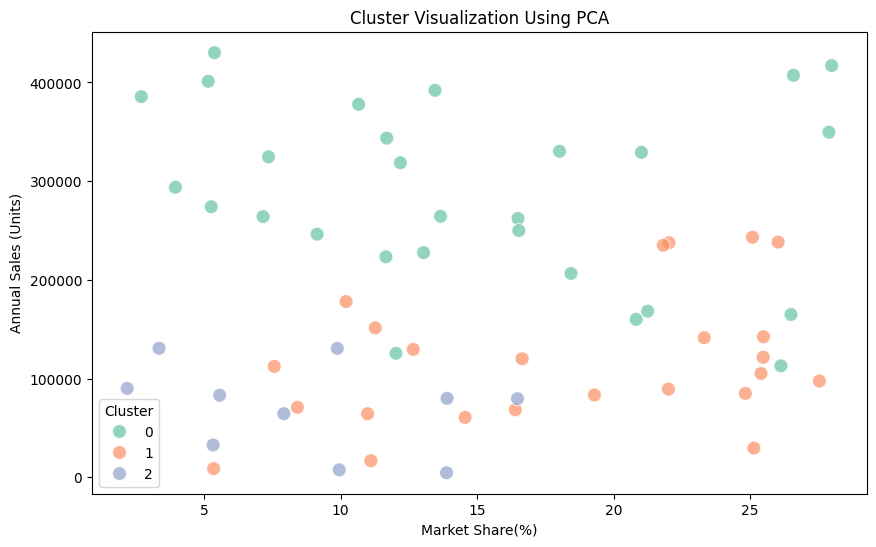

In [45]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Plot clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Market Share (%)"], 
    y=df["Annual Sales (Units)"], 
    hue="Cluster", 
    data=df,
    palette="Set2", 
    s=100, 
    alpha=0.7
)
plt.title("Cluster Visualization Using PCA")
plt.xlabel("Market Share(%)")
plt.ylabel("Annual Sales (Units)")
plt.legend(title="Cluster")
plt.show()


C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_4872\475775691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Market Share (%)", data=df, palette="Set3", ax=axes[0, 0])
C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_4872\475775691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Production Capacity (Units/Year)", data=df, palette="Set3", ax=axes[0, 1])
C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_4872\475775691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Annual 

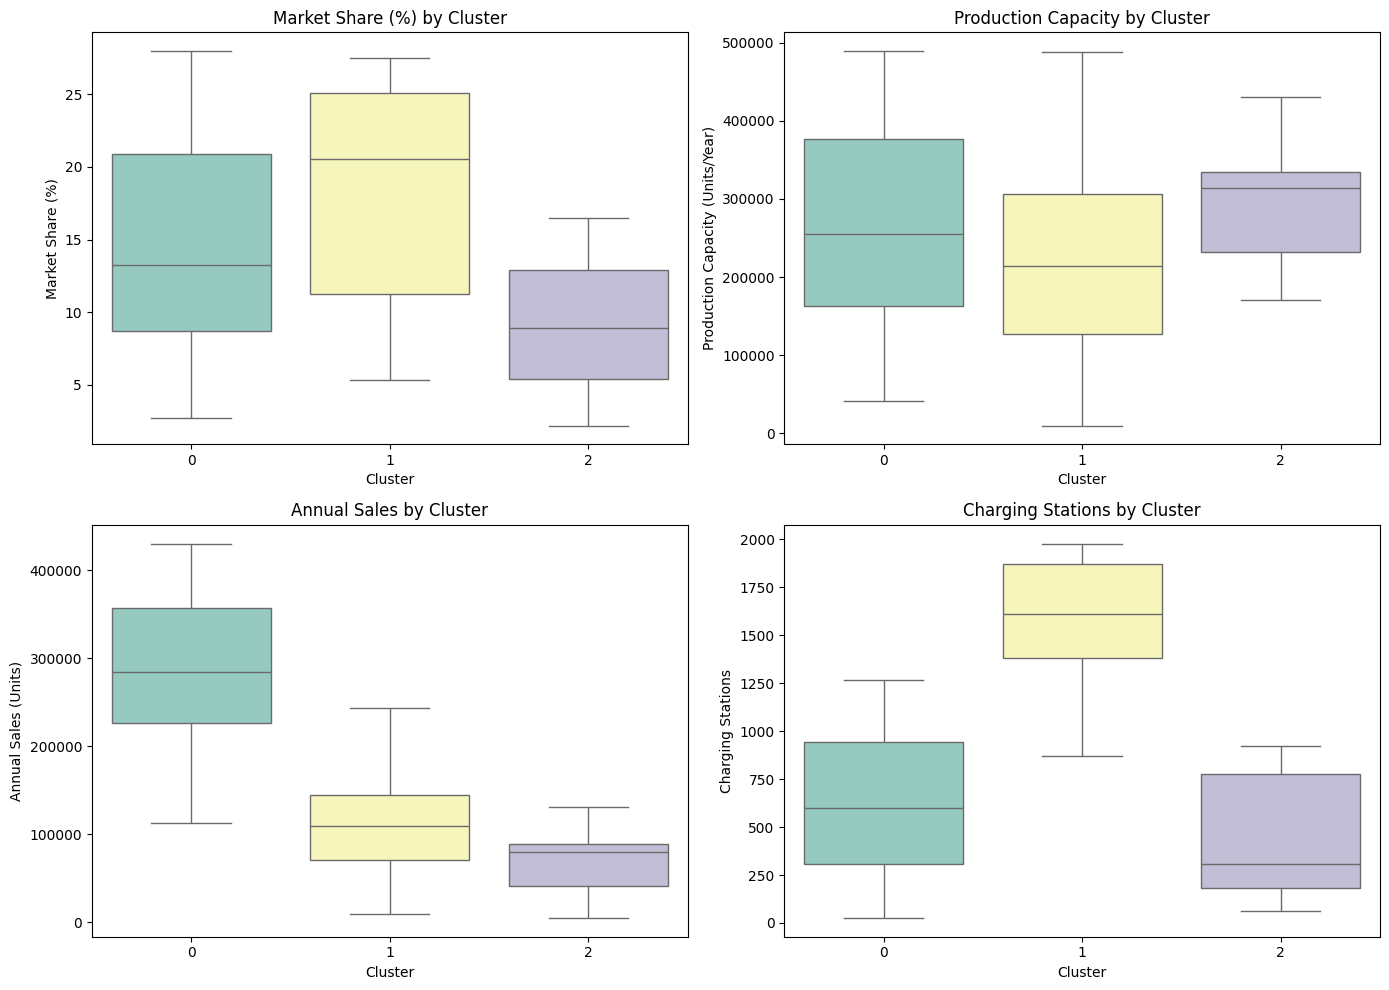

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Market Share by Cluster
sns.boxplot(x="Cluster", y="Market Share (%)", data=df, palette="Set3", ax=axes[0, 0])
axes[0, 0].set_title("Market Share (%) by Cluster")

# Production Capacity by Cluster
sns.boxplot(x="Cluster", y="Production Capacity (Units/Year)", data=df, palette="Set3", ax=axes[0, 1])
axes[0, 1].set_title("Production Capacity by Cluster")

# Annual Sales by Cluster
sns.boxplot(x="Cluster", y="Annual Sales (Units)", data=df, palette="Set3", ax=axes[1, 0])
axes[1, 0].set_title("Annual Sales by Cluster")

# Charging Stations by Cluster
sns.boxplot(x="Cluster", y="Charging Stations", data=df, palette="Set3", ax=axes[1, 1])
axes[1, 1].set_title("Charging Stations by Cluster")

# Adjust layout and display
plt.tight_layout()
plt.show()


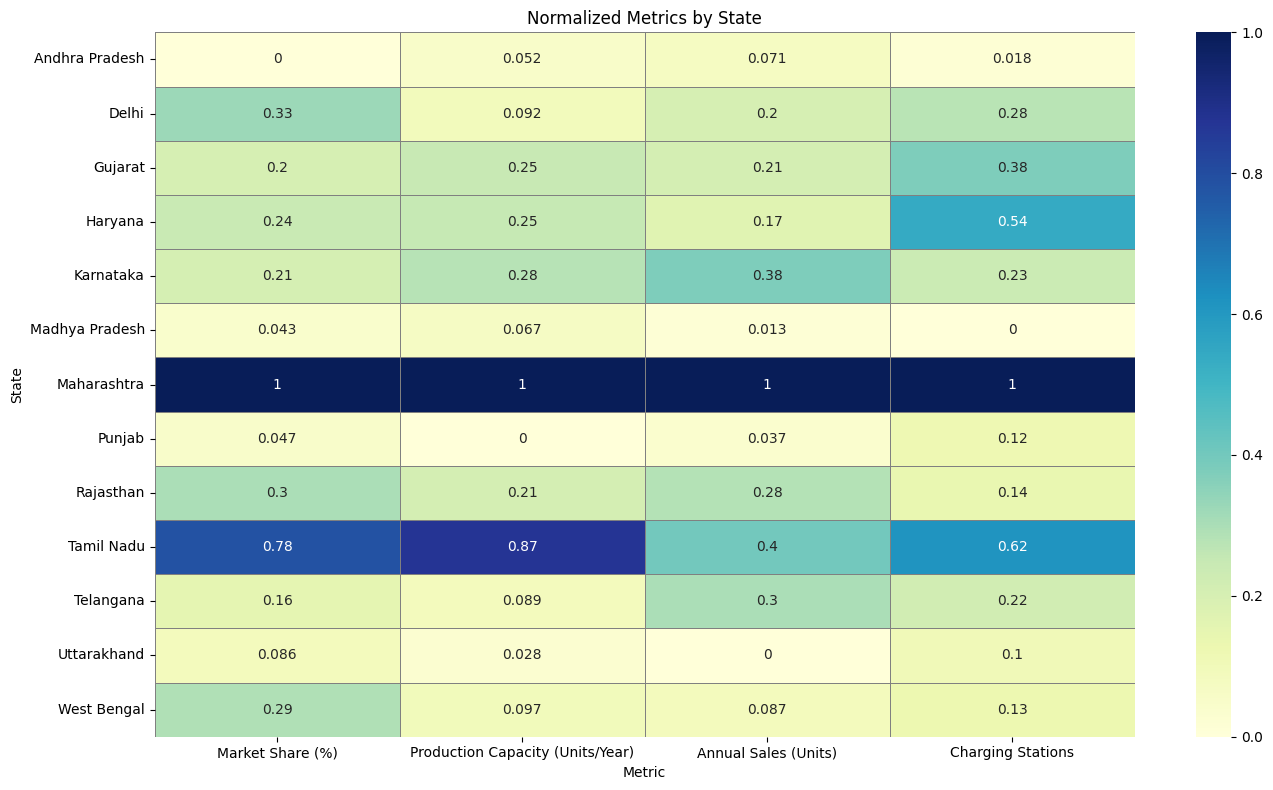

In [51]:
import seaborn as sns

state_grouped = df.groupby("State")[["Market Share (%)", "Production Capacity (Units/Year)", 
                                     "Annual Sales (Units)", "Charging Stations"]].sum()

# Normalize values for better heatmap contrast (optional)
normalized_data = state_grouped.copy()
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(normalized_data, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Normalized Metrics by State")
plt.xlabel("Metric")
plt.ylabel("State")
plt.tight_layout()
plt.show()


C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_4872\2283503490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="State", y="Annual Sales (Units)", data=df, ax=axes[0], inner="box", palette="Pastel1")
C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_4872\2283503490.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\khushi sharma\AppData\Local\Temp\ipykernel_4872\2283503490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Place", y="Annual Sales (Units)", data=df, ax=axes[1], inner="box", palette="Pastel2")
C:\

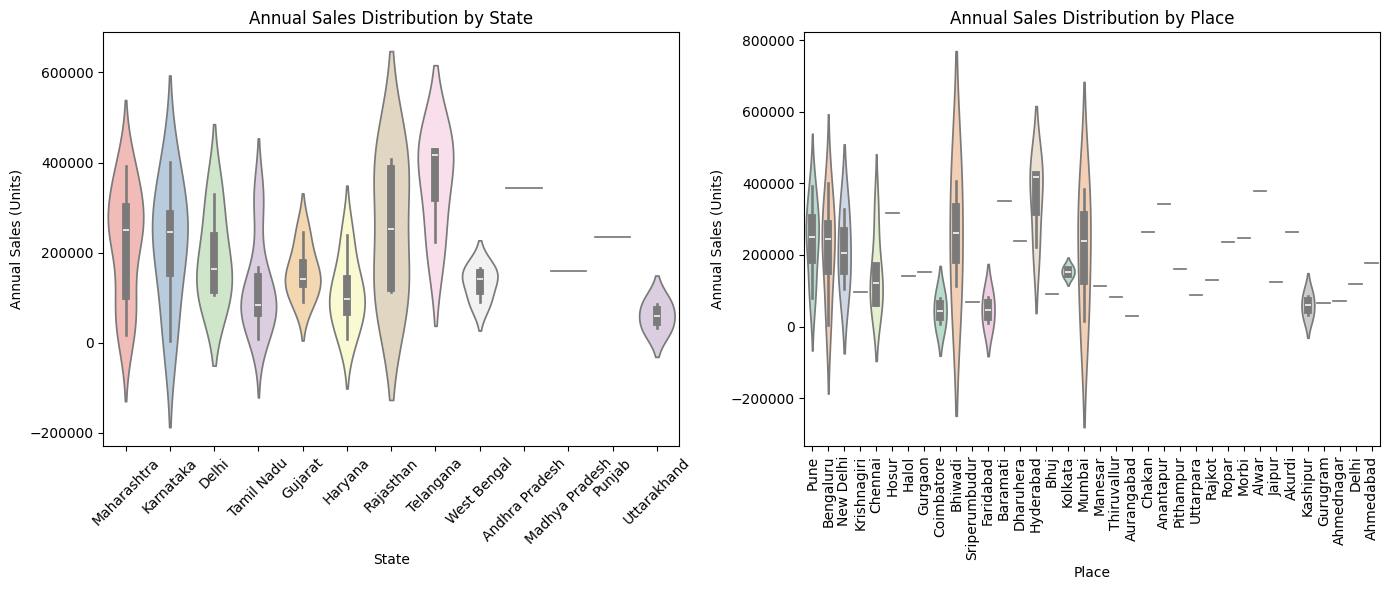

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot for State-wise distribution
sns.violinplot(x="State", y="Annual Sales (Units)", data=df, ax=axes[0], inner="box", palette="Pastel1")
axes[0].set_title("Annual Sales Distribution by State")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Annual Sales (Units)")

# Violin plot for Place-wise distribution
sns.violinplot(x="Place", y="Annual Sales (Units)", data=df, ax=axes[1], inner="box", palette="Pastel2")
axes[1].set_title("Annual Sales Distribution by Place")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Annual Sales (Units)")

plt.tight_layout()
plt.show()


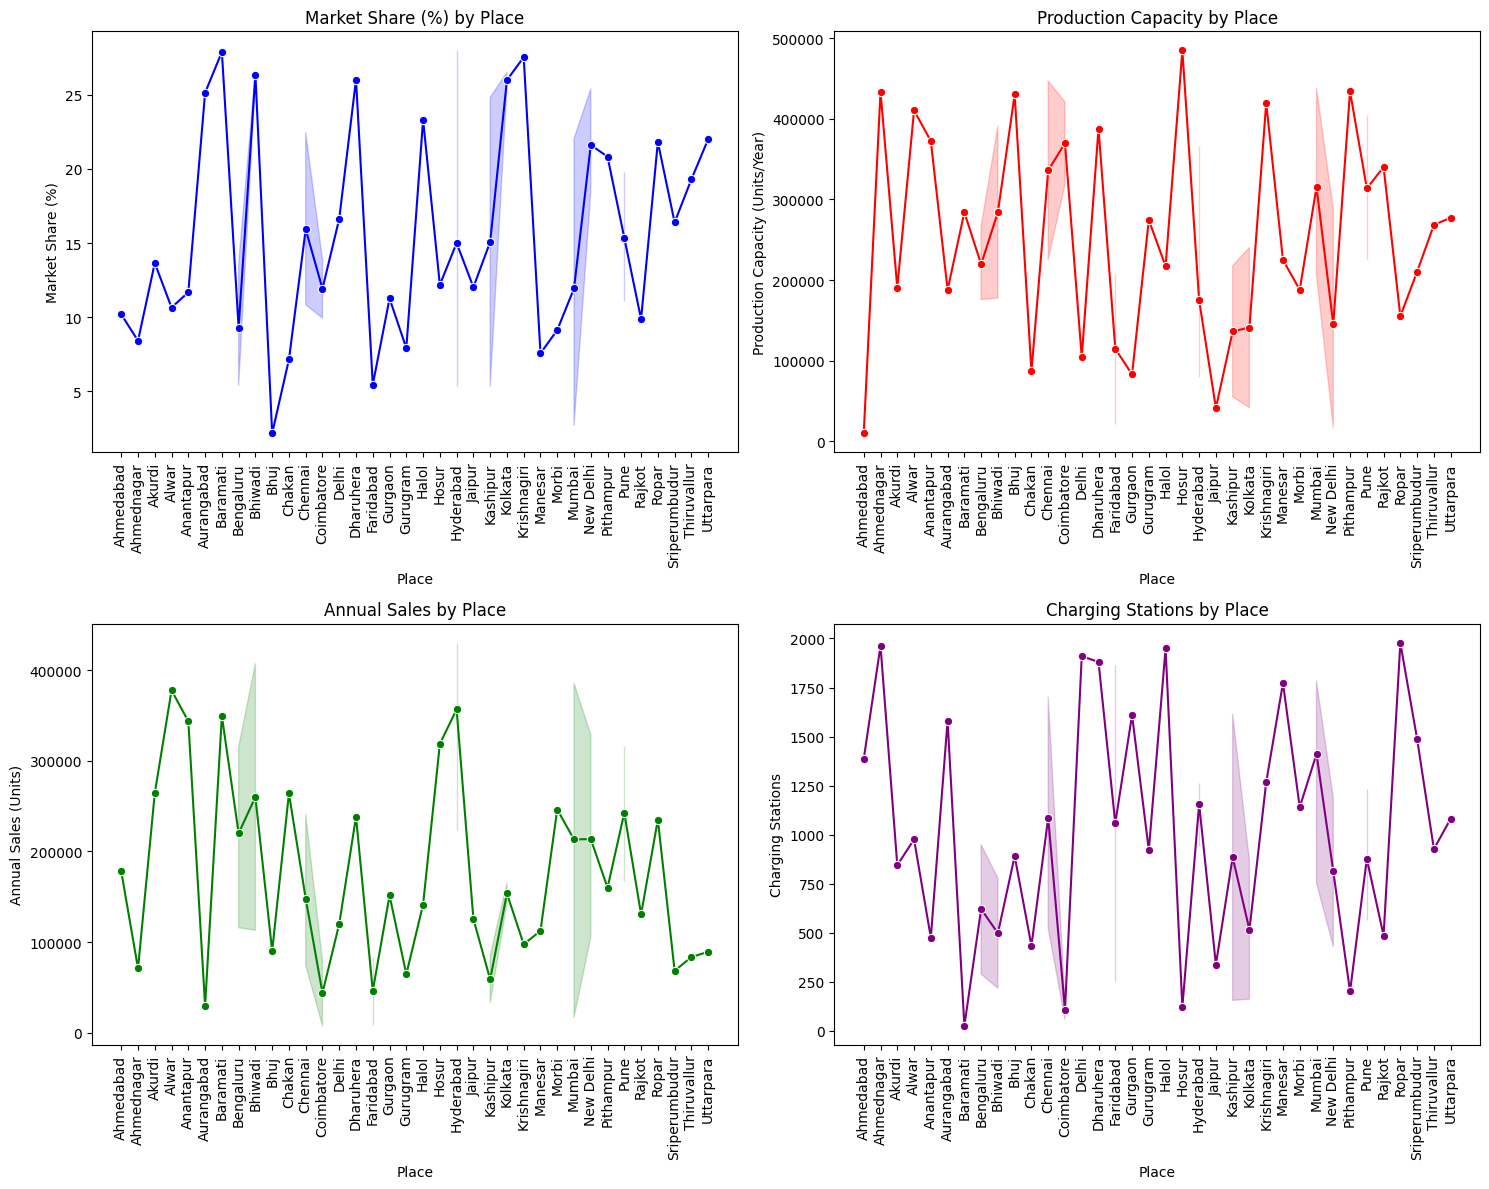

In [58]:
 #Set figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sorting data by Place for better visualization
df_sorted = df.sort_values("Place")

# Line plots for different metrics
sns.lineplot(x="Place", y="Market Share (%)", data=df_sorted, marker='o', ax=axes[0, 0], color='b')
axes[0, 0].set_title("Market Share (%) by Place")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.lineplot(x="Place", y="Production Capacity (Units/Year)", data=df_sorted, marker='o', ax=axes[0, 1], color='r')
axes[0, 1].set_title("Production Capacity by Place")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.lineplot(x="Place", y="Annual Sales (Units)", data=df_sorted, marker='o', ax=axes[1, 0], color='g')
axes[1, 0].set_title("Annual Sales by Place")
axes[1, 0].tick_params(axis='x', rotation=90)

sns.lineplot(x="Place", y="Charging Stations", data=df_sorted, marker='o', ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Charging Stations by Place")
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


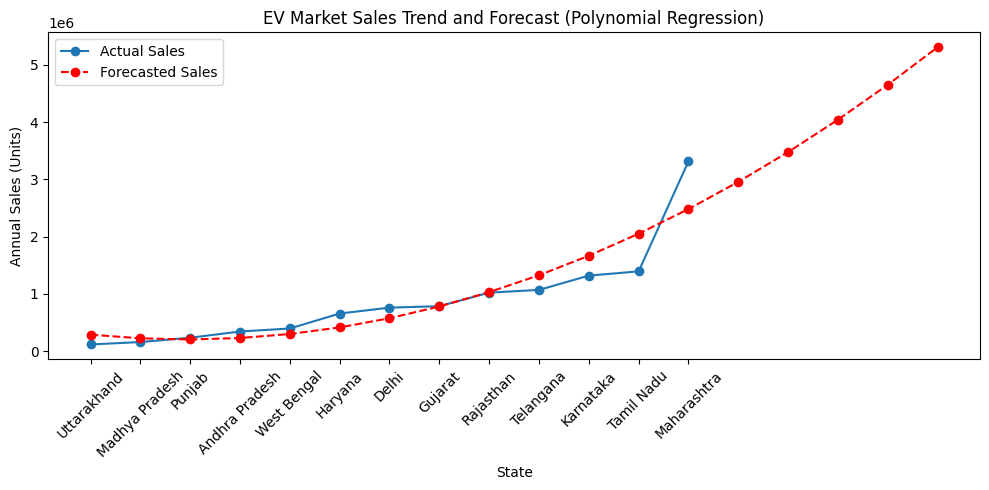

In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Aggregating and sorting data by total sales
df_trend = df.groupby("State")["Annual Sales (Units)"].sum().reset_index()
df_trend = df_trend.sort_values(by="Annual Sales (Units)").reset_index(drop=True)

# Preparing data for regression (using index as a proxy for order)
X = np.arange(len(df_trend)).reshape(-1, 1)
y = df_trend["Annual Sales (Units)"].values

# Polynomial features
degree = 2  # you can experiment with higher degrees if needed
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Forecasting the next 5 "steps" (as index continues)
future_X = np.arange(len(df_trend), len(df_trend) + 5).reshape(-1, 1)
future_X_poly = poly.transform(future_X)
future_sales = model.predict(future_X_poly)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_trend["State"], y, marker="o", label="Actual Sales")
plt.plot(
    np.concatenate((X, future_X)).flatten(),
    np.concatenate((model.predict(X_poly), future_sales)),
    linestyle="--", marker="o", color="red", label="Forecasted Sales"
)
plt.xticks(ticks=np.arange(len(df_trend)), labels=df_trend["State"], rotation=45)
plt.xlabel("State")
plt.ylabel("Annual Sales (Units)")
plt.title("EV Market Sales Trend and Forecast (Polynomial Regression)")
plt.legend()
plt.tight_layout()
plt.show()

